In [1]:
import pandas as pd

In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

2025-08-17 13:45:16.750586: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-17 13:45:17.447124: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-17 13:45:18.764421: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
I0000 00:00:1755449120.581284   74122 gpu_device.cc:2020] Created device /device:GPU:0 with

'/device:GPU:0'

In [3]:
df = pd.read_csv("train.zip", header=None, names=['ClassIndex' ,'Título', 'Descrição'])

In [4]:
df

,ClassIndex,Título,Descrição
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


In [5]:
df['Texto'] = df['Título'] + ' ' + df['Descrição']

In [6]:
df['Texto']

0         Wall St. Bears Claw Back Into the Black (Reute...
1         Carlyle Looks Toward Commercial Aerospace (Reu...
2         Oil and Economy Cloud Stocks' Outlook (Reuters...
3         Iraq Halts Oil Exports from Main Southern Pipe...
4         Oil prices soar to all-time record, posing new...
                                ...                        
119995    Pakistan's Musharraf Says Won't Quit as Army C...
119996    Renteria signing a top-shelf deal Red Sox gene...
119997    Saban not going to Dolphins yet The Miami Dolp...
119998    Today's NFL games PITTSBURGH at NY GIANTS Time...
119999    Nets get Carter from Raptors INDIANAPOLIS -- A...
Name: Texto, Length: 120000, dtype: object

In [7]:
df['ClassIndex'] = df['ClassIndex'] - 1

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_treino, X_teste, y_treino, y_teste = train_test_split(
    df['Texto'].values,
    df['ClassIndex'].values,
    test_size=0.2,
    random_state=4256,
)

In [10]:
import tensorflow as tf

In [11]:
VOCAB_SIZE = 1_000

In [12]:
encoder = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)

I0000 00:00:1755449121.116946   74122 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9307 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


In [13]:
encoder.adapt(X_treino)

In [14]:
encoder.get_vocabulary()[::10]

['',
 np.str_('39s'),
 np.str_('it'),
 np.str_('was'),
 np.str_('two'),
 np.str_('company'),
 np.str_('than'),
 np.str_('million'),
 np.str_('corp'),
 np.str_('which'),
 np.str_('next'),
 np.str_('sales'),
 np.str_('announced'),
 np.str_('killed'),
 np.str_('if'),
 np.str_('set'),
 np.str_('10'),
 np.str_('british'),
 np.str_('prime'),
 np.str_('least'),
 np.str_('games'),
 np.str_('month'),
 np.str_('largest'),
 np.str_('five'),
 np.str_('sports'),
 np.str_('higher'),
 np.str_('being'),
 np.str_('players'),
 np.str_('australia'),
 np.str_('like'),
 np.str_('general'),
 np.str_('ago'),
 np.str_('rise'),
 np.str_('ahead'),
 np.str_('release'),
 np.str_('work'),
 np.str_('strong'),
 np.str_('nearly'),
 np.str_('attacks'),
 np.str_('support'),
 np.str_('sun'),
 np.str_('long'),
 np.str_('crude'),
 np.str_('life'),
 np.str_('version'),
 np.str_('future'),
 np.str_('yankees'),
 np.str_('best'),
 np.str_('results'),
 np.str_('defense'),
 np.str_('southern'),
 np.str_('elections'),
 np.str_('

In [15]:
Exemplo = "Today's NFL games PITTSBURGH at NY GIANTS"

In [16]:
encoder(Exemplo)

<tf.Tensor: shape=(7,), dtype=int64, numpy=array([  1, 719, 200,   1,  14,   1, 506])>

In [17]:
modelo = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=16,
        mask_zero=True,
    ),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax'),
])

In [18]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [19]:
X_teste[1]

"Palestinians Pour Out Grief Over Arafat's Death  RAMALLAH, West Bank (Reuters) - Palestinians streamed into  the streets of the West Bank and Gaza Strip on Thursday in an  outpouring of grief over the death of Yasser Arafat, the  enduring symbol of their nationalist cause."

In [20]:
modelo.predict(X_teste[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


array([[0.254349  , 0.24967143, 0.24985084, 0.24612878]], dtype=float32)

In [21]:
modelo.predict(X_teste[:1]).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([0])

In [22]:
y_teste[1]

np.int64(0)

In [23]:
epocas = 10

In [24]:
history = modelo.fit(X_treino, y_treino, epochs=epocas, validation_data=(X_teste, y_teste))

Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.5314 - loss: 1.2157 - val_accuracy: 0.7224 - val_loss: 0.9667
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7781 - loss: 0.8047 - val_accuracy: 0.8034 - val_loss: 0.6643
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8157 - loss: 0.5903 - val_accuracy: 0.8251 - val_loss: 0.5319
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8329 - loss: 0.5042 - val_accuracy: 0.8355 - val_loss: 0.4812
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8428 - loss: 0.4671 - val_accuracy: 0.8425 - val_loss: 0.4566
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8490 - loss: 0.4461 - val_accuracy: 0.8491 - val_loss: 0.4406
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8532 - loss: 0.4314 - val_accuracy: 0.8522 - val_loss: 0.4297
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8571 - loss: 0.42

In [25]:
import matplotlib.pylab as plt


In [26]:
def plota_resultados(history, epocas):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    intervalo_epocas = range(epocas)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(intervalo_epocas, acc, label='Acurácia do Treino')
    plt.plot(intervalo_epocas, val_acc, label='Acurácia da Validação')
    plt.legend(loc='lower right')


    plt.subplot(1, 2, 2)
    plt.plot(intervalo_epocas, loss, label='Custo do Treino')
    plt.plot(intervalo_epocas, val_loss, label='Custo da Validação')
    plt.legend(loc='upper right')
    plt.show()


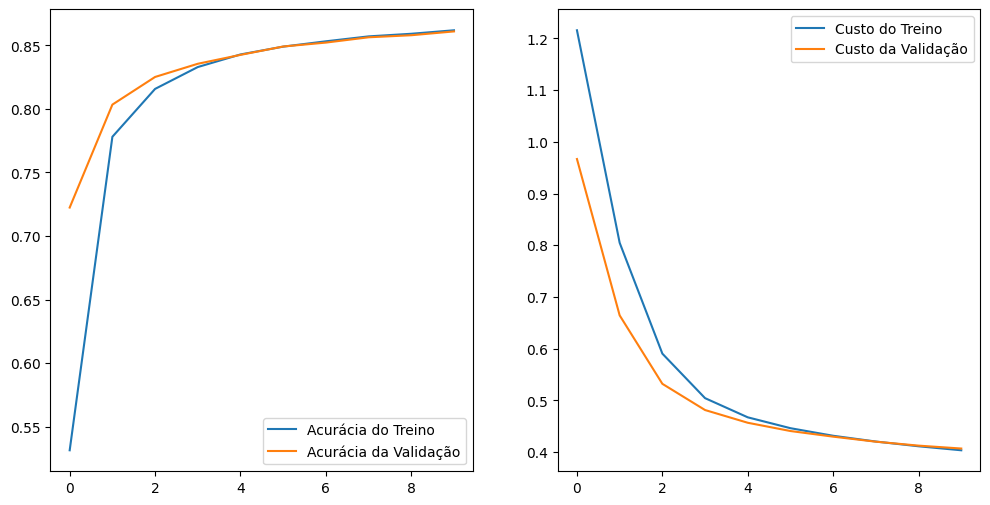

In [27]:
plota_resultados(history,epocas)

In [28]:
modelo = tf.keras.Sequential(
    [
        encoder,
        tf.keras.layers.Embedding(
            input_dim=len(encoder.get_vocabulary()),
            output_dim=16,
            mask_zero=False,
        ),
        tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
        tf.keras.layers.MaxPooling1D(),
        tf.keras.layers.Conv1D(128, kernel_size=4, activation='relu'),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax'),
    ]
)

In [29]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [30]:
history = modelo.fit(X_treino, y_treino, epochs=epocas, validation_data=(X_teste, y_teste))

Epoch 1/10


2025-08-17 13:46:59.822981: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91100


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - accuracy: 0.6495 - loss: 0.8541 - val_accuracy: 0.8217 - val_loss: 0.5106
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.8258 - loss: 0.5067 - val_accuracy: 0.8423 - val_loss: 0.4626
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.8411 - loss: 0.4713 - val_accuracy: 0.8506 - val_loss: 0.4448
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.8470 - loss: 0.4527 - val_accuracy: 0.8524 - val_loss: 0.4336
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.8532 - loss: 0.4361 - val_accuracy: 0.8597 - val_loss: 0.4181
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.8558 - loss: 0.4238 - val_accuracy: 0.8614 - val_loss: 0.4069
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.8574 - loss: 0.4149 - val_accuracy: 0.8625 - val_loss: 0.3992
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.8600 - loss: 0.4064 - va

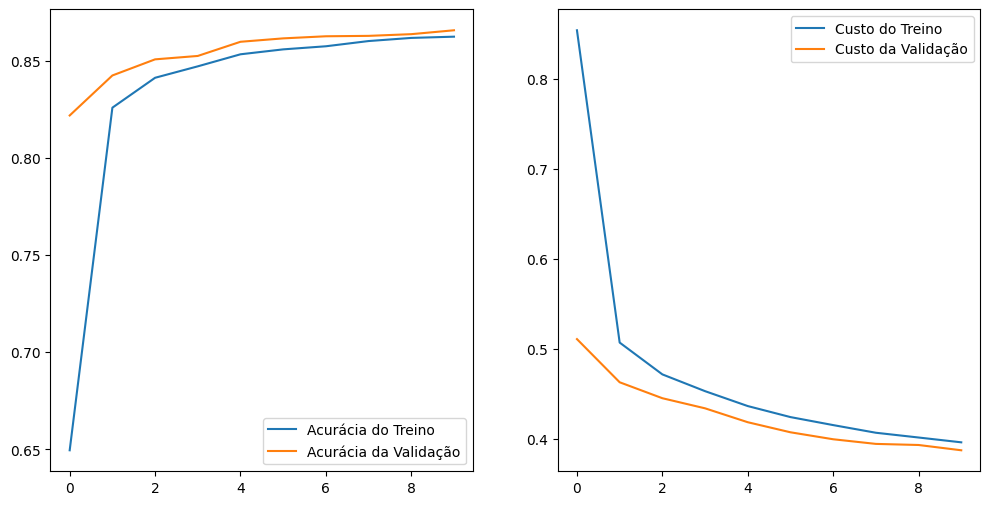

In [31]:
plota_resultados(history,epocas)

In [33]:
modelo = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        mask_zero=False,
    ),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax'),
])

In [36]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [37]:
history = modelo.fit(
    X_treino,
    y_treino,
    epochs=epocas,
    validation_data=(X_teste, y_teste),
)

Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 46s 15ms/step - accuracy: 0.7392 - loss: 0.6813 - val_accuracy: 0.8534 - val_loss: 0.4207
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8532 - loss: 0.4432 - val_accuracy: 0.8594 - val_loss: 0.4000
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.8614 - loss: 0.4177 - val_accuracy: 0.8655 - val_loss: 0.3856
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - accuracy: 0.8659 - loss: 0.4018 - val_accuracy: 0.8689 - val_loss: 0.3727
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8683 - loss: 0.3946 - val_accuracy: 0.8622 - val_loss: 0.3795
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8704 - loss: 0.3857 - val_accuracy: 0.8684 - val_loss: 0.3680
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 43s 14ms/step - accuracy: 0.8714 - loss: 0.3785 - val_accuracy: 0.8707 - val_loss: 0.3630
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 43s 14ms/step - accuracy: 0.8731 -

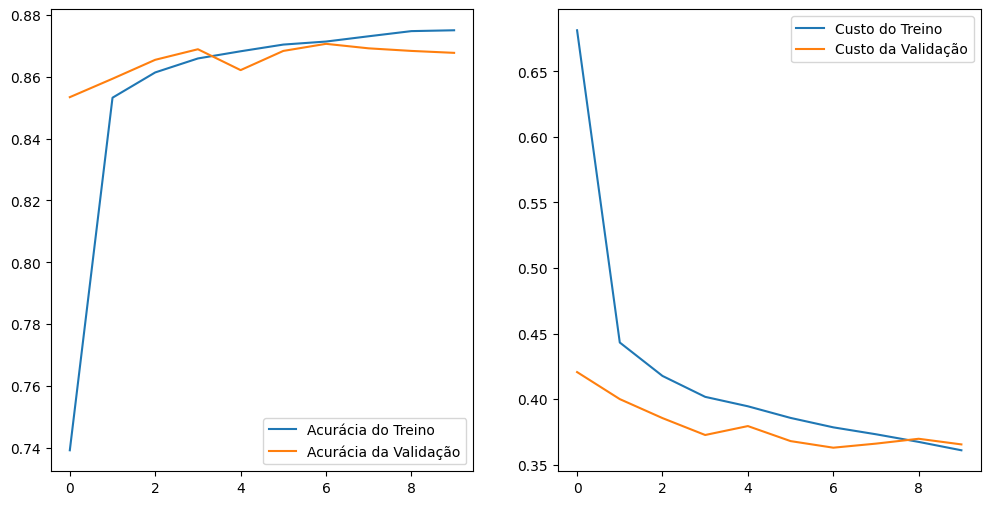

In [38]:
plota_resultados(history, epocas)

In [81]:
import keras_tuner as kt

In [82]:
def build_model(hp):
    model = tf.keras.Sequential([
        encoder,
        tf.keras.layers.Embedding(
            input_dim=len(encoder.get_vocabulary()),
            output_dim=hp.Int('embedding_dim', min_value=32, max_value=128, step=32),
            mask_zero=True
        ),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
            units=hp.Int('lstm_units', min_value=32, max_value=128, step=32),
            return_sequences=True
        )),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
            units=hp.Int('lstm_units', min_value=16, max_value=64, step=16)
        )),
        tf.keras.layers.Dense(
            units=hp.Int('dense_units', min_value=32, max_value=128, step=32),
            activation='relu'
        ),
        tf.keras.layers.Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)),
        tf.keras.layers.Dense(4, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [87]:
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=5,
    factor=3,
    directory='my_dir',
    project_name='classification_optimization',
)

In [88]:
from sklearn.model_selection import KFold

In [89]:
def run_tuner(X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    for train_index, val_index in kf.split(X):
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]

        tuner.search(X_train_fold, y_train_fold, epochs=2, validation_data=(X_val_fold, y_val_fold))

    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

    print(f"""
        A pesquisas da hiperparâmetros foi conlcuída. O númera ideal de dimensões de incorparação é {best_hps.get('Embedding_dim')}
        o número ideal de unidades LSTM é {best_hps.get('lstm_units')}, e
        o número ideal de unidades densas é {best_hps.get('dense_units')},
        e a taxa de adandono ideal é {best_hps.get('dropout')}
    """)

    return best_hps

In [91]:
best_hps = run_tuner(X_treino, y_treino)

KeyError: 'Embedding_dim does not exist.'

In [66]:
final_model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=best_hps.get('embedding_dim'),
        mask_zero=True
    ),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
        units=best_hps.get('lstm_units'),
        return_sequences=True
    )),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
        units=best_hps.get('lstm_units') // 2
    )),
    tf.keras.layers.Dense(
        units=best_hps.get('dense_units'),
        activation='relu'
    ),
    tf.keras.layers.Dropout(rate=best_hps.get('dropout')),
    tf.keras.layers.Dense(4, activation='softmax')
])

NameError: name 'best_hps' is not defined

In [ ]:
final_model.fit(X_treino, y_treino, epochs=10, validation_data=(X_teste, y_teste))

In [ ]:
y_pred = final_model.predict(X_teste)
y_pred_classes = y_pred.argmax(axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_teste, y_pred_classes)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1, 2, 3])
disp.plot(cmap=plt.cm.Blues)
plt.show()